# Charting PYLON Analysis Results

When you perform analysis with PYLON you receive aggregated results from the API. 

We carry out much of work with PYLON in iPython as by its nature the results is a documented workflow that can be easily shared.

In this notebook we'll take a look at how you can use common Python libraries to chart analysis results.

## Environment

To create this notebook we used:

* Python 2.7.6
* iPython 4.0.0
* pandas
* [DataSift client library](http://dev.datasift.com/tools/client-libraries)

The best way to install the above requirements is using [Anaconda](https://www.continuum.io/downloads). Anaconda provides a tested installation bundle including most popular Python packages.

## Working with Python dictionaries

When you perform analysis with PYLON your result will be returned from the API as JSON. The DataSift client library will parse the result into a dictionary for you.

This code illustrates this for a time series analysis. Essentially when you're working with results you'll be working with a Python dictionary.

In [3]:
import json

ts_api_result = '''{
    "interactions": 3188400,
    "unique_authors": 2234300,
    "analysis": {
        "analysis_type": "timeSeries",
        "parameters": {
            "interval": "day"
        },
        "results": [
            {
                "key": 1448496000,
                "interactions": 312200,
                "unique_authors": 259900
            },
            {
                "key": 1448582400,
                "interactions": 539700,
                "unique_authors": 414100
            },
            {
                "key": 1448668800,
                "interactions": 578600,
                "unique_authors": 475600
            },
            {
                "key": 1448755200,
                "interactions": 561000,
                "unique_authors": 439600
            },
            {
                "key": 1448841600,
                "interactions": 588600,
                "unique_authors": 495500
            },
            {
                "key": 1448928000,
                "interactions": 608100,
                "unique_authors": 496800
            }
        ],
        "redacted": false
    }
}'''

ts_result = json.loads(ts_api_result)

print ts_result

{u'analysis': {u'analysis_type': u'timeSeries', u'redacted': False, u'results': [{u'unique_authors': 259900, u'key': 1448496000, u'interactions': 312200}, {u'unique_authors': 414100, u'key': 1448582400, u'interactions': 539700}, {u'unique_authors': 475600, u'key': 1448668800, u'interactions': 578600}, {u'unique_authors': 439600, u'key': 1448755200, u'interactions': 561000}, {u'unique_authors': 495500, u'key': 1448841600, u'interactions': 588600}, {u'unique_authors': 496800, u'key': 1448928000, u'interactions': 608100}], u'parameters': {u'interval': u'day'}}, u'unique_authors': 2234300, u'interactions': 3188400}


## Charting time series results

So the result of a time series analysis will be returned as a dictionary. 

Before you plot a chart you'll first want to check if the entire analysis has been redacted and your dictionary contains results. You can check this using the 'redacted' flag in the dictionary.

Assuming you have results you'll net need to convert the results array into a Pandas dataframe. Use 'key' as the index value as this is the timestamp for each timeseries interval.

To plot the chart we first sort the data in the dataframe, and then call plot. Pandas takes care of the rest. In this example we specify the size of the chart using 'figsize' but this is optional.

Populating the interactive namespace from numpy and matplotlib


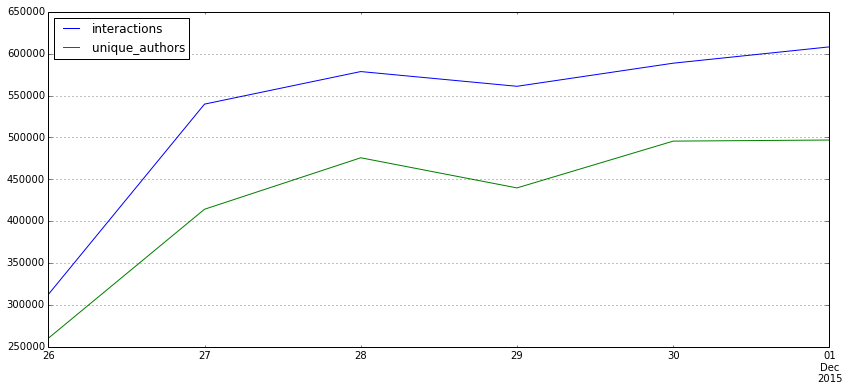

In [17]:
# This causes charts to be drawn inline
%pylab inline

# Import pandas for data manipulation
import pandas as pd

# Check result is not redacted
if not ts_result['analysis']['redacted']:

    # Extract result data to dataframe
    ts_df = pd.DataFrame.from_records(ts_result['analysis']['results'],index='key')
    
    # Map the index labels to readable dates
    ts_df.index=ts_df.index.map(datetime.datetime.fromtimestamp)
    
    # Sort the data and plot a chart
    ts_df.sort().plot(figsize=(14,6))

## Charting frequency distribution results

Before we look at an example chart, let's first parse some example JSON returned from the API for a frequency distribution analysis into a dictionary.

In [18]:
fd_api_result = '''{
    "interactions": 3188400,
    "unique_authors": 2234300,
    "analysis": {
        "analysis_type": "freqDist",
        "parameters": {
            "target": "fb.author.country",
            "threshold": 6
        },
        "results": [
            {
                "key": "United States",
                "interactions": 1121300,
                "unique_authors": 781400
            },
            {
                "key": "Brazil",
                "interactions": 283100,
                "unique_authors": 204800
            },
            {
                "key": "Turkey",
                "interactions": 181000,
                "unique_authors": 136700
            },
            {
                "key": "United Kingdom",
                "interactions": 172800,
                "unique_authors": 128400
            },
            {
                "key": "Mexico",
                "interactions": 151200,
                "unique_authors": 95000
            },
            {
                "key": "Germany",
                "interactions": 122000,
                "unique_authors": 84800
            }
        ],
        "redacted": false
    }
}'''

fd_result = json.loads(fd_api_result)

print ts_result

{u'analysis': {u'analysis_type': u'timeSeries', u'redacted': False, u'results': [{u'unique_authors': 259900, u'key': 1448496000, u'interactions': 312200}, {u'unique_authors': 414100, u'key': 1448582400, u'interactions': 539700}, {u'unique_authors': 475600, u'key': 1448668800, u'interactions': 578600}, {u'unique_authors': 439600, u'key': 1448755200, u'interactions': 561000}, {u'unique_authors': 495500, u'key': 1448841600, u'interactions': 588600}, {u'unique_authors': 496800, u'key': 1448928000, u'interactions': 608100}], u'parameters': {u'interval': u'day'}}, u'unique_authors': 2234300, u'interactions': 3188400}


Again, before you plot the chart make sure the analysis has not been redacted.

Next, extract the data from the results array into a pandas dataframe.

You can now plot the chart. Here we've sorted the results by the 'unique_authors' column to present the results in an intuitive order. We've also specified 'barh' for the type of plot as a horizontal bar chart displays nicely inside a workbook.

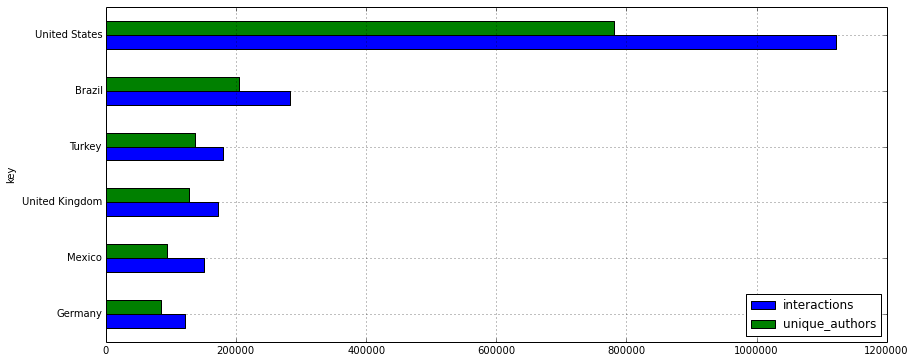

In [21]:
# Check result is not redacted
if not ts_result['analysis']['redacted']:

    # Extract result data to dataframe
    fd_df = pd.DataFrame.from_records(fd_result['analysis']['results'],index='key')
    
    # Sort the data and plot a chart
    fd_df.sort(columns=['unique_authors']).plot(kind='barh',figsize=(14,6))

## Charting nested query results

Again let's first parse some example JSON returned from the API for a nested analysis query.

In [22]:
nested_api_result = '''{
    "unique_authors": 556400, 
    "analysis": {
        "analysis_type": "freqDist", 
        "redacted": false, 
        "results": [
            {
                "child": {
                    "analysis_type": "freqDist", 
                    "redacted": false, 
                    "results": [
                        {
                            "unique_authors": 124500, 
                            "key": "18-24", 
                            "interactions": 151900
                        }, 
                        {
                            "unique_authors": 124200, 
                            "key": "25-34", 
                            "interactions": 146200
                        }, 
                        {
                            "unique_authors": 76400, 
                            "key": "35-44", 
                            "interactions": 96000
                        }, 
                        {
                            "unique_authors": 43800, 
                            "key": "45-54", 
                            "interactions": 57400
                        }, 
                        {
                            "unique_authors": 19500, 
                            "key": "55-64", 
                            "interactions": 26400
                        }
                    ], 
                    "parameters": {
                        "threshold": 5, 
                        "target": "fb.author.age"
                    }
                }, 
                "unique_authors": 404800, 
                "key": "male", 
                "interactions": 492000
            }, 
            {
                "child": {
                    "analysis_type": "freqDist", 
                    "redacted": false, 
                    "results": [
                        {
                            "unique_authors": 34300, 
                            "key": "25-34", 
                            "interactions": 43200
                        }, 
                        {
                            "unique_authors": 31200, 
                            "key": "35-44", 
                            "interactions": 35600
                        }, 
                        {
                            "unique_authors": 31200, 
                            "key": "18-24", 
                            "interactions": 34800
                        }, 
                        {
                            "unique_authors": 21400, 
                            "key": "45-54", 
                            "interactions": 26400
                        }, 
                        {
                            "unique_authors": 12600, 
                            "key": "55-64", 
                            "interactions": 15500
                        }
                    ], 
                    "parameters": {
                        "threshold": 5, 
                        "target": "fb.author.age"
                    }
                }, 
                "unique_authors": 141400, 
                "key": "female", 
                "interactions": 164500
            }
        ], 
        "parameters": {
            "threshold": 2, 
            "target": "fb.author.gender"
        }
    }, 
    "interactions": 671300
}'''

nested_result = json.loads(nested_api_result)

print nested_result

{u'analysis': {u'analysis_type': u'freqDist', u'redacted': False, u'results': [{u'interactions': 492000, u'key': u'male', u'unique_authors': 404800, u'child': {u'analysis_type': u'freqDist', u'redacted': False, u'results': [{u'key': u'18-24', u'unique_authors': 124500, u'interactions': 151900}, {u'key': u'25-34', u'unique_authors': 124200, u'interactions': 146200}, {u'key': u'35-44', u'unique_authors': 76400, u'interactions': 96000}, {u'key': u'45-54', u'unique_authors': 43800, u'interactions': 57400}, {u'key': u'55-64', u'unique_authors': 19500, u'interactions': 26400}], u'parameters': {u'threshold': 5, u'target': u'fb.author.age'}}}, {u'interactions': 164500, u'key': u'female', u'unique_authors': 141400, u'child': {u'analysis_type': u'freqDist', u'redacted': False, u'results': [{u'key': u'25-34', u'unique_authors': 34300, u'interactions': 43200}, {u'key': u'35-44', u'unique_authors': 31200, u'interactions': 35600}, {u'key': u'18-24', u'unique_authors': 31200, u'interactions': 34800},

Again, before you plot the chart make sure the analysis has not been redacted.

At this point you'll want to consider how you'd like to present your results. The example data represents a gender-age breakdown of an audience. In this case it makes sense to draw a chart for each gender.

In the example code below we first setup a subplots, one for each gender. Next we iterate through the child analysis results. Here there is 2, one for each gender indicated by the 'key' field. Finally we draw each subplot based on the data in the child result just like we did above for the frequency distribution analysis.

Notice that we sort the dataframe by its index before plotting to maintain the natural 

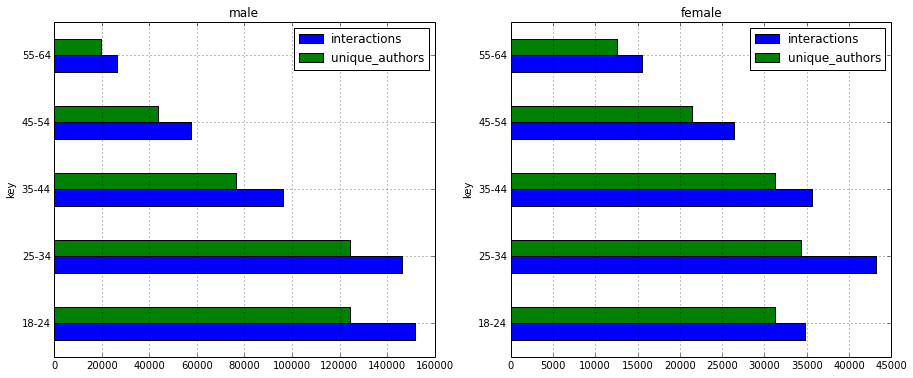

In [73]:
# Check result is not redacted
if not ts_result['analysis']['redacted']:

    # Set up subplots, one for each gender
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    
    # Iterate through genders, drawing a subplot for each
    for i, child in enumerate(nested_result['analysis']['results']):
        
        nested_df = pd.DataFrame.from_records(child['child']['results'],index='key')
        nested_df.sort_index().plot(kind='barh', ax=axes[i], title=child['key'])